<a href="https://colab.research.google.com/github/GAmuzak/RL_Demo/blob/master/reinforcement_learning_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The idea is to get code to produce the best possible steps to get out of this room. 
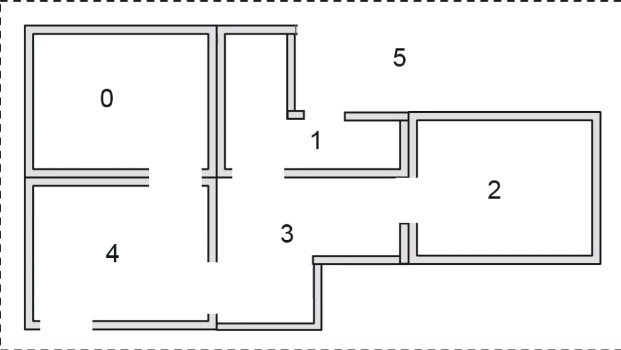

We can be dropped into any room between 0-4, and we must head out to room 5

In [1]:
import numpy as np

In [2]:
R=np.matrix([[-1,-1,-1,-1, 0, -1],
             [-1,-1,-1, 0,-1,100],
             [-1,-1,-1, 0,-1, -1],
             [-1, 0, 0,-1, 0, -1],
             [-1, 0, 0,-1,-1,100],
             [-1, 0,-1,-1, 0,100]])
#so the idea here is you go from x to y, x and y being the row and the coloumn.
#-1 means it's not possible, 0 means there is no reward, and 100 means there is a full reward.

In [3]:
#our q matrix initialisation
Q=np.matrix(np.zeros([6,6]))
Q

matrix([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

In [4]:
#our discount factor. The bigger it is, the more it cares about rewards in the distant future
gamma=0.8

In [5]:
#returns the list of available rooms to travel to
def available_actions(state):
  current_state_row=R[state]
  avail_action=np.where(current_state_row>=0)[1]
  return avail_action

In [6]:
#returns a next room at random
def sample_next_action(current_state):
  next_action=np.random.choice(available_actions(current_state))
  return next_action

In [7]:
def update(current_state, gamma):
  action=sample_next_action(current_state)
  max_index=np.where(Q[action]==np.max(Q[action]))[1]

  if max_index.shape[0]>1:
    max_index=np.random.choice(max_index, size=1)
  max_value=Q[action,max_index]
  
  #Q learning formula
  Q[current_state, action]= R[current_state, action]+gamma*max_value

In [8]:
from tqdm import tqdm
for i in tqdm(range(10000)):
  current_state=np.random.randint(0,int(Q.shape[0]))
  update(current_state, gamma)

100%|██████████| 10000/10000 [00:00<00:00, 10076.53it/s]


In [9]:
#normalise results for visualisation
print(Q/np.max(Q) * 100)

[[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.   64.    0.    0. ]
 [  0.   80.   51.2   0.   80.    0. ]
 [  0.   80.   51.2   0.    0.  100. ]
 [  0.   80.    0.    0.   80.  100. ]]


In [10]:
#test function
def test(current_state):
  while current_state!=5:
    next_step_index=np.where(Q[current_state]==np.max(Q[current_state]))[1]

    if next_step_index.shape[0]>1:
      next_step_index=int(np.random.choice(next_step_index, size=1))
    else:
      next_step_index=int(next_step_index)

    steps.append(next_step_index)
    current_state=next_step_index

In [11]:
#testing model

current_state=2 #this is our initial room, change for different results
steps=[current_state] #we will append the rooms out algo enters here
test(current_state)

In [12]:
print("Selected path:", steps)

Selected path: [2, 3, 1, 5]
